In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from src.theme import colors

# font parameters
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12

In [2]:
dfp = pd.concat([
    pd.read_csv("results/profiling_carbonara.csv", index_col=0, names=['sid','carbonara'], header=0),
    pd.read_csv("results/profiling_esm.csv", index_col=0, names=['sid','esm'], header=0),
    pd.read_csv("results/profiling_mpnn.csv", index_col=0, names=['sid','mpnn'], header=0)
], axis=1)
dfp

,carbonara,esm,mpnn
sid,,,
2KKJ_A,0.385176,0.643657,3.406109
6A5I_A,0.068229,0.536256,2.721029
3EG1_B,0.062711,0.439255,2.681774
1KKL_I,0.078234,0.695609,2.748821
3N29_A,0.290569,3.280953,3.604519
...,...,...,...
6KBR_C,0.059351,0.432365,2.642766
4E5S_A,0.232910,2.464780,3.420076
4MI1_A,0.236626,2.566999,3.464575


In [3]:
# insert sequence length info
for sid in dfp.index.values:
    # define fasta filepath
    fasta_filepath = f"benchmark_data/wt/monomers/{sid}.fasta"

    # read fasta file
    with open(fasta_filepath, 'r') as fs:
        raw_str = fs.read()

    # extract and store sequence length
    dfp.loc[sid, 'seq_len'] = len(raw_str.split('\n')[-1])

In [4]:
dfp.mean()

carbonara      0.141848
esm            1.366990
mpnn           3.027407
seq_len      177.246479
dtype: float64

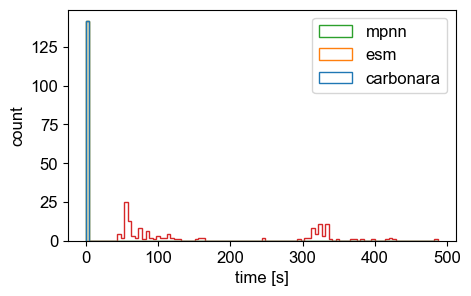

In [5]:
plt.figure(figsize=(5,3))
plt.hist(dfp.values, bins=100, histtype='step', label=['carbonara', 'esm', 'mpnn'])
plt.legend(loc='best')
plt.xlabel('time [s]')
plt.ylabel('count')
plt.show()

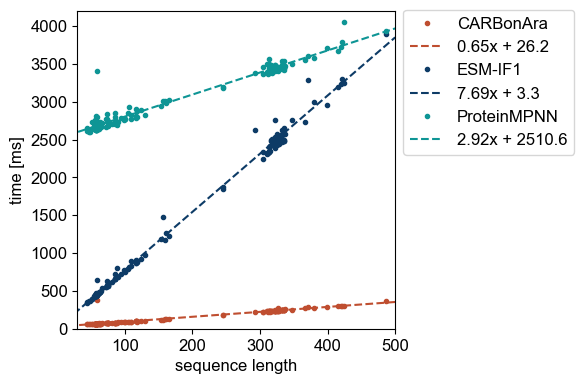

In [6]:
labels = ["CARBonAra", "ESM-IF1", "ProteinMPNN"]

x = dfp['seq_len'].values
Y = dfp[['carbonara', 'esm', 'mpnn']].values * 1e3

# linear fit
P = np.array([np.polyfit(x, Y[:,i], 1) for i in range(Y.shape[1])])
xp = np.linspace(0.0, 500.0, 100)
Yp = P[:,0].reshape(1,-1) * xp.reshape(-1,1) + P[:,1].reshape(1,-1)

# plot
plt.figure(figsize=(6,4))
for i in range(Y.shape[1]):
    plt.plot(x, Y[:,i], '.', label=labels[i], color=colors[i])
    plt.plot(xp, Yp[:,i], '--', label=f"{P[i,0]:.2f}x + {P[i,1]:.1f}", color=colors[i])
#plt.legend(loc='best')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03))
plt.ylabel('time [ms]')
plt.xlabel('sequence length')
plt.xlim(30.0, 500.0)
plt.ylim(0.0, 4200.0)
plt.tight_layout()
plt.savefig("graphs/profiling_gpu_runtime.svg")
plt.savefig("graphs/profiling_gpu_runtime.png", dpi=300)
plt.show()